In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
bank=pd.read_csv("bank-full.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.shape

(45211, 17)

In [5]:
bank.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


SINCE ALL THE FEATURE COLUMNS ARE IN OBJECT ,CONVERT IT TO NUMERIC FORM FOR FURTHER ANALYSIS:::
USING LABEL ENCODER CONVERT ALL THE FETURES TO NUMERIC FORM

In [6]:
lm=LabelEncoder()
bank['job']=lm.fit_transform(bank['job']) #0=admin,1=unknown,2=unemployed,3=management,4=housemaid,5=entrepreneur,6=student,
                                                # 7=blue-collar,8=self-employed,9=retired,10=technician,11=services
bank['marital']=lm.fit_transform(bank['marital'])    #1=married,2=divorced/widowed,3=single
bank['education']=lm.fit_transform(bank['education']) #1=unknown,2=secondary,3-primary,4-tertiary
bank['default']=lm.fit_transform(bank['default']) # 1=yes,0=no
bank['housing']=lm.fit_transform(bank['housing'])# 1=yes,0=no
bank['loan']=lm.fit_transform(bank['loan']) #1=yes,0=no
bank['contact']=lm.fit_transform(bank['contact'])#0=unknown,1=telephone,2=celluar
bank['month']=lm.fit_transform(bank['month']) # 0--12==> jan to dec
bank['poutcome']=lm.fit_transform(bank['poutcome']) #0=unknown,1=other,2=faliure,2=success
# output variable Y
bank['y']=lm.fit_transform(bank['y'])

In [7]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [8]:
X=bank.iloc[:,0:16]
Y=bank.iloc[:,16]

In [9]:
classifier=LogisticRegression()
classifier.fit(X,Y)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
classifier.intercept_

array([-0.07051122])

In [11]:
classifier.coef_

array([[-3.16802510e-02,  1.45562359e-02, -9.21153757e-02,
        -1.31789867e-02, -4.79306390e-03,  4.00082184e-05,
        -1.81574381e-01, -5.34974933e-02, -1.86731320e-01,
        -8.41855234e-03, -6.00572603e-02,  3.27099854e-03,
        -2.67026891e-01, -1.23824925e-03,  1.19987817e-01,
        -1.80555425e-01]])

In [12]:
 y_pred=classifier.predict(X)
y_pred_df=({'actual':Y, 'predicted_y':classifier.predict(X)})

In [13]:
y_pred_df

{'actual': 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 45206    1
 45207    1
 45208    1
 45209    0
 45210    0
 Name: y, Length: 45211, dtype: int32,
 'predicted_y': array([0, 0, 0, ..., 0, 0, 0])}

In [14]:
# to find the confusion matrix and accurcay
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39279   643]
 [ 4438   851]]


In [15]:
ac(Y,y_pred)  # ACCURACY OF THE Y AND ITS PREDCITED VALUE

0.8876158457012674

In [16]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



PLOT FOR ROC CURVE AND AREA UNDER THE CURVE

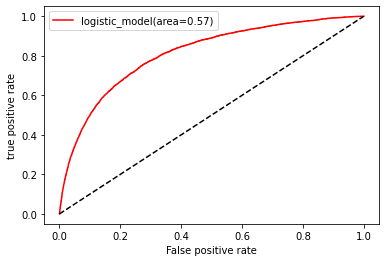

In [17]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
fpr,tpr,threshold=roc_curve(Y,classifier.predict_proba(X)[:,1])
auc=roc_auc_score(Y,y_pred)
plt.plot(fpr,tpr,color='red',label='logistic_model(area=%.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel("true positive rate")
plt.legend(loc='best')
plt.show()

In [18]:
auc

0.5723967867991099

FINDING THE ACCURACY BY TRAIN TEST METHOD ALSO

In [19]:
# train test method
from sklearn.model_selection import train_test_split

In [20]:
X=bank.iloc[:,0:16]
Y=bank.iloc[:,16]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=100)

In [22]:
x_train.shape

(30291, 16)

In [23]:
y_train.shape

(30291,)

In [24]:
# using Logsitic Regression  for the tarin test split data
classifier=LogisticRegression( max_iter=31000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=31000)

In [25]:
y_test_predict=classifier.predict(x_test)

In [26]:
y_test_predict

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
ac(y_test_predict,y_test)

0.8880697050938338

In [28]:
classifier.intercept_

array([-1.24914829])

In [29]:
classifier.coef_

array([[-1.03588183e-02, -2.55819515e-03, -5.35858640e-02,
         7.47794259e-02, -1.24948378e-01,  2.26707319e-05,
        -1.07406047e+00, -7.97886299e-01, -5.82673518e-01,
        -1.30449810e-02,  1.66189643e-02,  3.80139978e-03,
        -1.40790089e-01,  6.57352065e-04,  5.09399509e-02,
        -1.71998162e-01]])

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test_predict,y_test)

array([[12921,  1415],
       [  255,   329]], dtype=int64)

In [31]:
print(classification_report(y_test_predict,y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     14336
           1       0.19      0.56      0.28       584

    accuracy                           0.89     14920
   macro avg       0.58      0.73      0.61     14920
weighted avg       0.95      0.89      0.91     14920



#  extraa work on the logistic regression

 using Decision tree

In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [33]:
X=bank.iloc[:,0:16]
Y=bank.iloc[:,16]

In [34]:
model=DecisionTreeRegressor()
model.fit(X,Y)

DecisionTreeRegressor()

In [35]:
print(model.feature_importances_)

[0.0981601  0.04291203 0.01795875 0.02469804 0.00185278 0.12812037
 0.02281242 0.00830411 0.01689696 0.08843823 0.09911475 0.28765545
 0.03710011 0.0566777  0.01196602 0.05733218]


In [39]:
y_pred=model.predict(X)
y_df=({'actual':Y,'predcited_y':model.predict(X)})
y_df

{'actual': 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 45206    1
 45207    1
 45208    1
 45209    0
 45210    0
 Name: y, Length: 45211, dtype: int32,
 'predcited_y': array([0., 0., 0., ..., 1., 0., 0.])}

In [40]:
accuracy_score(y_pred,Y)

1.0